In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score, roc_curve

# PELDA ADATHALMAZ LETREHOZAS

In [2]:
X, y = make_classification(
    n_samples=10000, n_features=5, n_informative=2,
    n_redundant=3, n_classes=2, flip_y=0.2, random_state=1)

In [3]:
X = pd.DataFrame(X)
y = pd.Series(y)

In [4]:
X.columns = [f'input_{col}' for col in X.columns]

In [5]:
y.name = 'target'

In [8]:
df = pd.concat([X, y], axis=1)

In [9]:
df

,input_0,input_1,input_2,input_3,input_4,target
0,-0.491993,0.827928,-0.664744,-0.362554,0.492098,1
1,-0.365364,1.005213,-0.335089,0.046923,0.544254,1
2,-0.771178,0.746120,-1.266015,-1.015042,0.518671,0
3,-0.143132,0.505532,-0.085885,0.108879,0.264394,1
4,-0.122420,0.082061,-0.215750,-0.190597,0.065672,1
...,...,...,...,...,...,...
9995,-0.484356,0.245461,-0.885793,-0.818254,0.223546,0
9996,-0.013841,-1.136248,-0.489684,-0.949302,-0.517284,0
9997,1.113461,-1.440213,1.680512,1.171627,-0.915121,1
9998,0.214919,-1.868817,-0.321794,-1.062255,-0.905316,0


# PREDIKCIOK

In [10]:
# keszitsunk predikciokat
# - egy baseline random "model" (np.random.rand())
# - egy logreg model (pred es pred_proba)

In [11]:
np.random.seed(1)
df['pred_random'] = np.random.rand(df.shape[0])

In [12]:
model = LogisticRegression()

In [13]:
df['pred'] = cross_val_predict(model, X, y, cv=4)

In [14]:
pred_proba = cross_val_predict(model, X, y, cv=4, method='predict_proba')
pred_proba

array([[0.23905285, 0.76094715],
       [0.20087809, 0.79912191],
       [0.25696228, 0.74303772],
       ...,
       [0.86624403, 0.13375597],
       [0.91851546, 0.08148454],
       [0.21111905, 0.78888095]])

In [15]:
# df.loc[sorindex, oszlopindex] minden sor/oszlop :
df['pred_proba'] = pred_proba[:, 1]

# ROC - AUC SKLEARN

In [16]:
# szamoljuk ki auc scoret a kulonbozo eredmenyeken
# keszitsunk abrazolo fuggvenyt, aminek a bemenete a 
# valos es a prediktalt erteket kapva
# elkesziti a roc gorbet

In [17]:
roc_auc_score(df['target'], df['pred_random'])

0.4906544106544106

In [18]:
# dont do this:
roc_auc_score(df['target'], df['pred'])

0.8039734039734039

In [19]:
roc_auc_score(df['target'], df['pred_proba'])

0.8582071382071382

Text(0.5, 1.0, 'ROC')

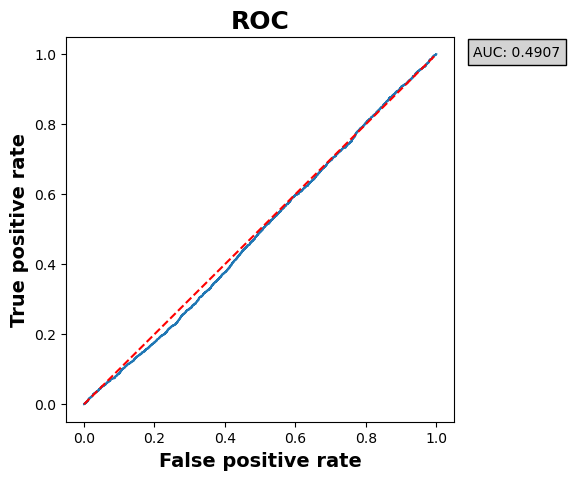

In [20]:
# fpr and tpr are coordinates
fpr, tpr, thresholds = roc_curve(df['target'], df['pred_random'])
auc = roc_auc_score(df['target'], df['pred_random'])


plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr)
# red line
plt.plot([0, 1], [0, 1], color='r', ls='--')
annotate_text = f'AUC: {round(auc, 4)}'
plt.annotate(annotate_text, (1.05, 0.95),
             xycoords='axes fraction',
             bbox={'facecolor': 'lightgray'})
plt.xlabel('False positive rate', fontweight='bold', fontsize=14)
plt.ylabel('True positive rate', fontweight='bold', fontsize=14)
plt.title('ROC', fontweight='bold', fontsize=18)

# PLOT FUNCTION

In [21]:
def create_roc_auc_plot(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)


    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], color='r', ls='--')
    annotate_text = f'AUC: {round(auc, 4)}'
    # where to put the text 1.05 and 0.95
    plt.annotate(annotate_text, (1.05, 0.95),
                 xycoords='axes fraction',
                 bbox={'facecolor': 'lightgray'})
    plt.xlabel('False positive rate', fontweight='bold', fontsize=14)
    plt.ylabel('True positive rate', fontweight='bold', fontsize=14)
    plt.title('ROC', fontweight='bold', fontsize=18)
    return None

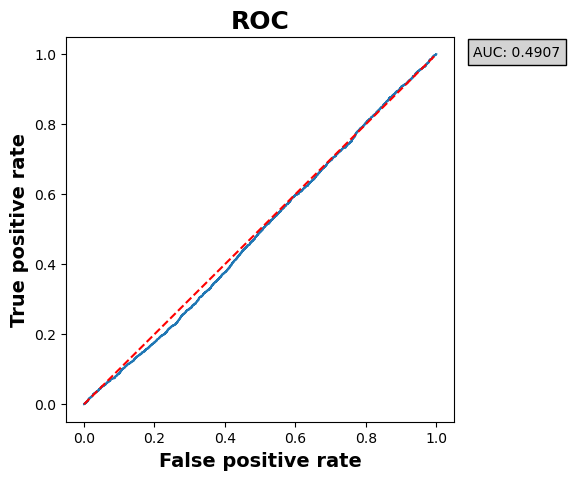

In [22]:
create_roc_auc_plot(df['target'], df['pred_random'])

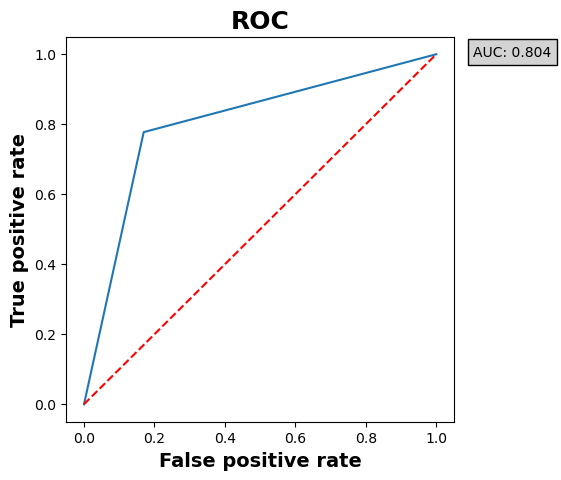

In [23]:
create_roc_auc_plot(df['target'], df['pred'])

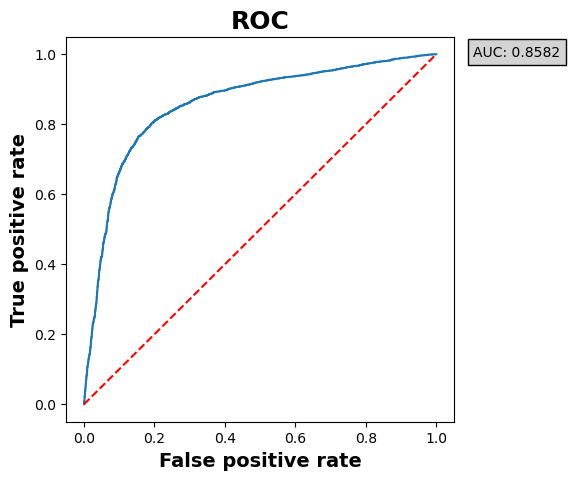

In [24]:
create_roc_auc_plot(df['target'], df['pred_proba'])

# ROC GORBE KEZZEL

In [ ]:
        # keszitsuk el a roc gorbet kezzel
        # - rakjuk novekvo sorba a predikciokat
        # - keszitsunk egy 'x' es egy 'y' oszlopot a df-be
        # - soronkent az x erteket noveljuk, amikor a celvaltozo 0
        # - soronkent az y erteket noveljuk, amikor a celvaltozo 1
        # - normalizaljuk az x, y oszlopokat ( osszuk el a maximum ertekukkel )
        # - abrazoljuk az x, y ertekeinket (plt.scatter(df['x'], df['y']))

In [25]:
df = df.sort_values('pred_proba', ascending=False).reset_index(drop=True)

In [26]:
df['y'] = df['target']
df['x'] = 1 - df['target']

In [27]:
df['y'] = df['y'].cumsum()
df['x'] = df['x'].cumsum()

In [28]:
# scale from 0 to 1
df['y'] = df['y'] / df['y'].max()
df['x'] = df['x'] / df['x'].max()

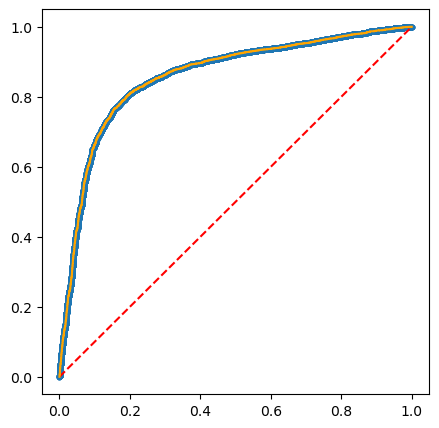

In [34]:
plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], s=10)
plt.plot([0, 1], [0, 1], color='r', ls='--')
fpr, tpr, thresholds = roc_curve(df['target'], df['pred_proba'])
plt.plot(fpr, tpr, color='orange')

# AUC mint valoszinuseg

In [35]:
# vegyunk 2 mintat a df-bol
# - 1000 elemu mintat, ahol a target==1, a 'pred_proba' oszlopot tartsuk csak meg
# - 1000 elemu mintat, ahol a target==0, a 'pred_proba' oszlopot tartsuk csak meg
# - tegyuk egymas melle a 2 mintat, es nezzuk meg hany szazaleknal magasabbak a
# target==1 a 'pred_proba' ertekek

In [36]:
sample_df = pd.DataFrame()

sample_df['target_1'] = df.loc[df['target']==1, 'pred_proba'].sample(1000, random_state=1).reset_index(drop=True)

sample_df['target_0'] = df.loc[df['target']==0, 'pred_proba'].sample(1000, random_state=1).reset_index(drop=True)

In [37]:
sample_df['target_1_bigger'] = sample_df['target_1'] > sample_df['target_0']

In [38]:
sample_df['target_1_bigger'].mean()

0.854